#### Initial Setup

In [1]:
import pandas as pd
from ecoILP import load_model, handleEdgeList, extractFeatures, predictLinks, plotMetrics, plotProbsMatrix

# Force reload modules each execution
%load_ext autoreload
%autoreload 2

#### Load a network

In [7]:
# Load an example network (verifies that the network is a from the test set)
# network = pd.read_csv('data/raw/networks/Web Of Life/Host-Parasite/A_HP_051.csv', index_col=0, header=0) # bigger one
network = pd.read_csv('data/raw/networks/Web Of Life/Plant-Pollinator/M_PL_061_02.csv', index_col=0, header=0)

# Convert the matrix to an edge list
edgeList = network.stack().rename_axis(['lower_level','higher_level']).rename('weight').reset_index()

#### Load a model

In [3]:
model = load_model() # default model

##### Case 1: Arbitrary removing links to test the model

Column "None" not found in edgelist dataframe, using index as link_ID


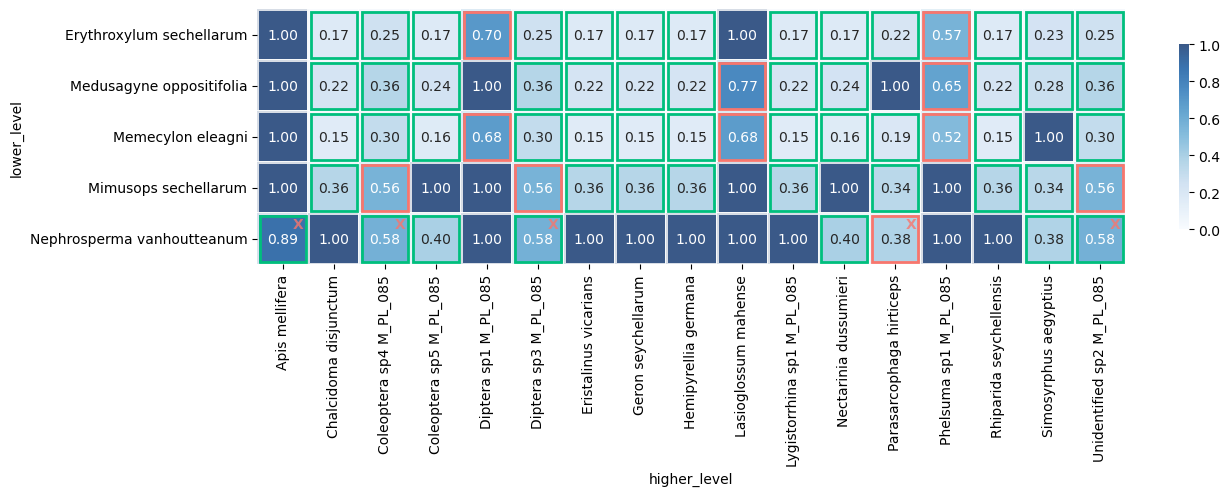

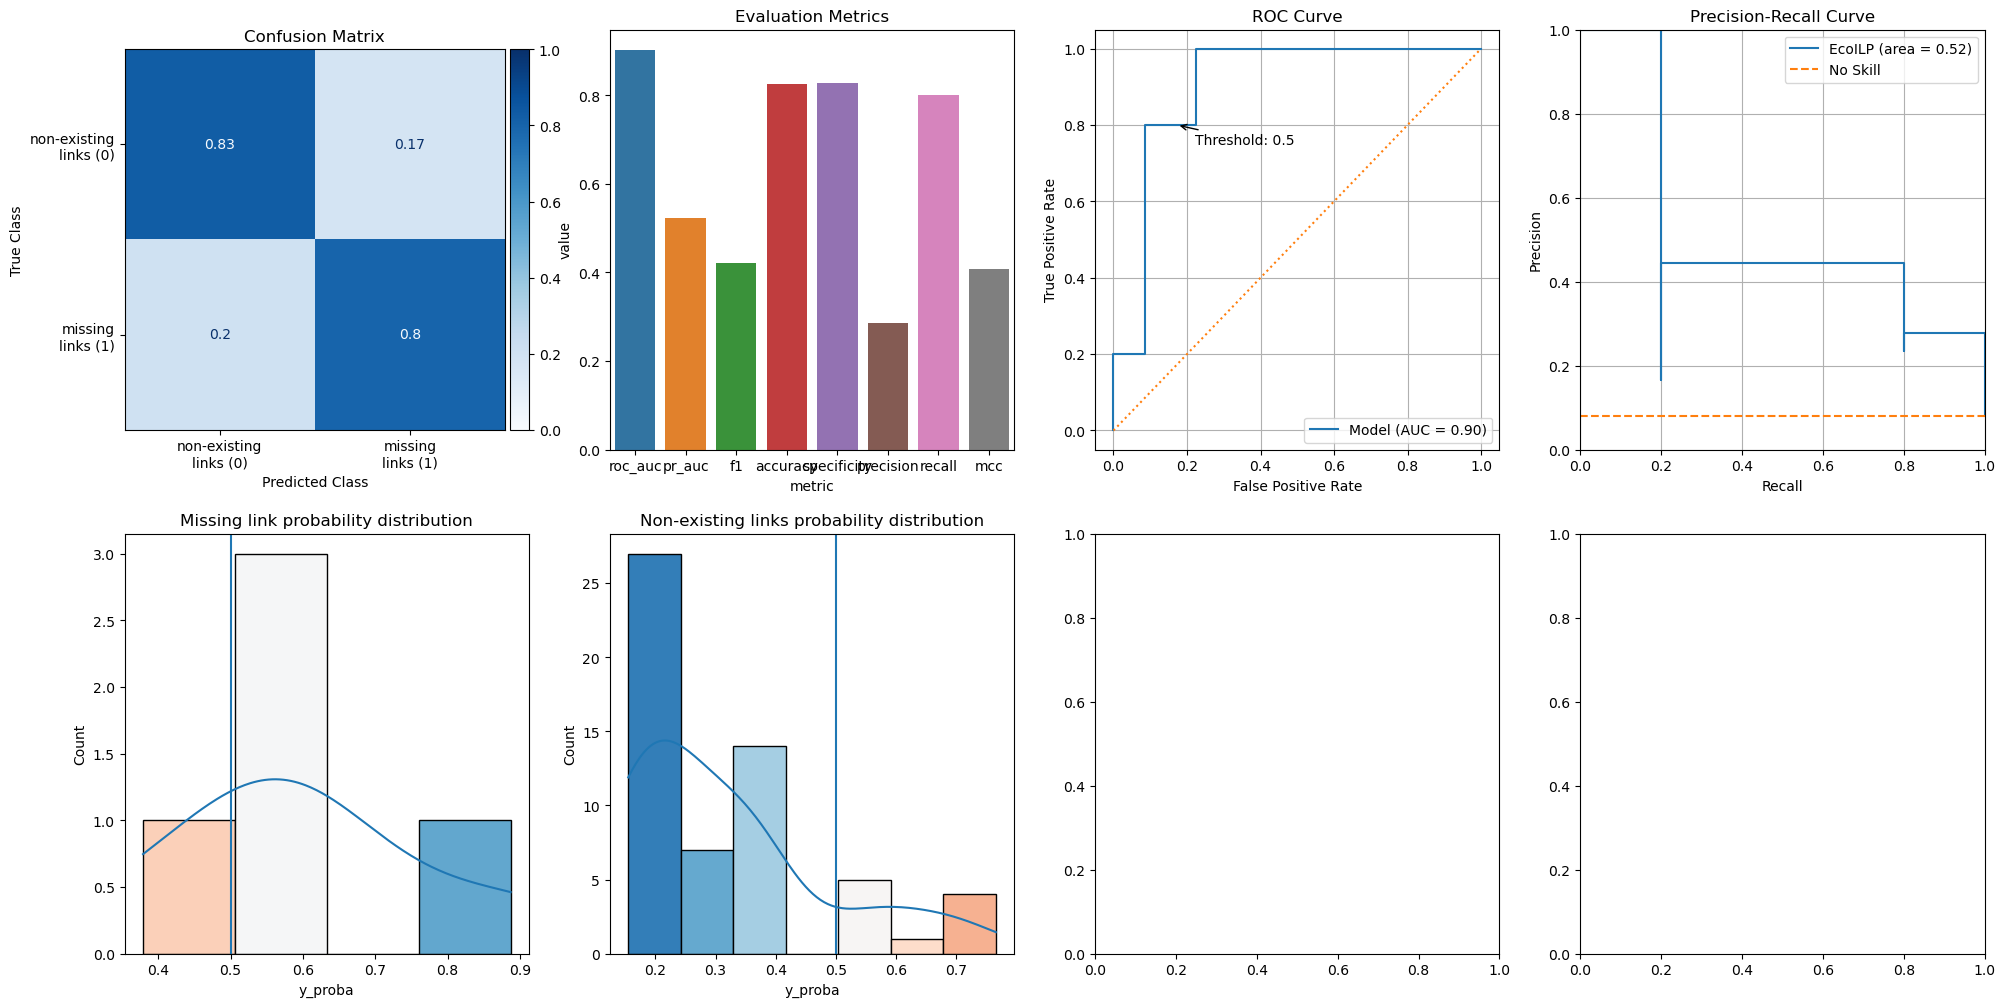

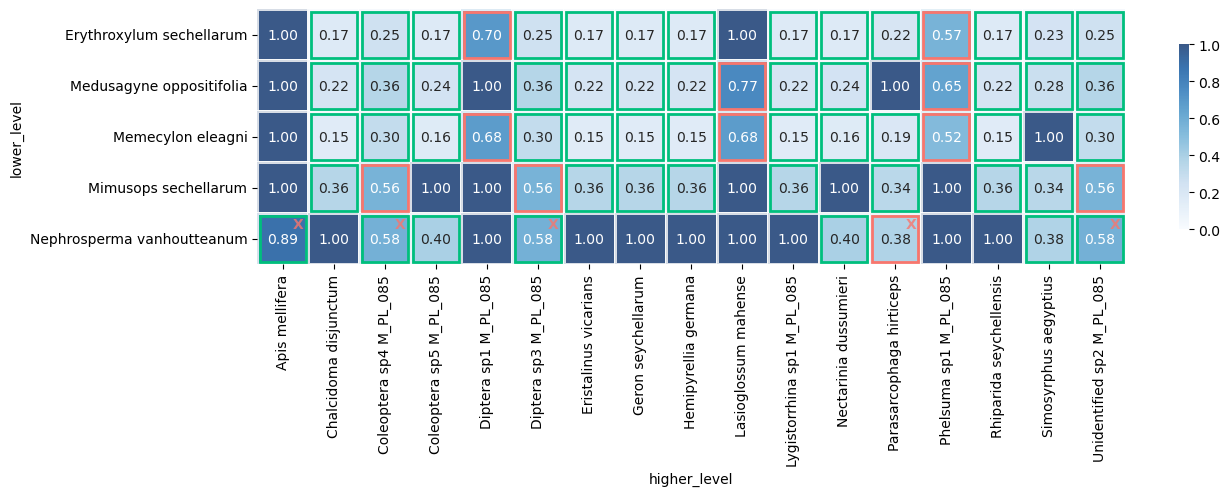

In [10]:
dataframe = handleEdgeList(
    edgeList, 
    linkID_col = None, # If the edge list doesn't have a column for link ID, it will be created
    topNodes_col = 'higher_level', 
    bottomNodes_col = 'lower_level', 
    networkID_col = None, # If the edge list doesn't have a column for network ID, a dummy value will be created
    groupID_col = None,
    weight_col = 'weight', # currently support only binary values though
    community = 'Host-Parasite', # in case the community is known but not in the groupID_col
    sample_fraction = 0.2, # fraction of missing links to create
    # missing_links = sample_network[sample_network['class'] == -1]['link_ID'], # if the missing links are predefined
    # groundTruth_col = 'class'
    )

dataframe_with_features = extractFeatures(dataframe)

probabilities, classifications = predictLinks(dataframe_with_features, model)

plotMetrics(
    dataframe_with_features, 
    probabilities, 
    plots=['confusion_matrix', 'single_evaluation', 'roc_curve', 'pr_curve', 'probs_distribution']
    )

plotProbsMatrix(dataframe, probabilities, figsize=(14,8))

Some non-existing links are falsely classified as existing links - they need attention as they might be really missing link!

##### Case 2: Predicting links without sampling

In [11]:
# Load an example network (verifies that the network is a from the test set)
network = pd.read_csv('data/raw/networks/Web Of Life/Host-Parasite/A_HP_001.csv', index_col=0, header=0)

# Convert the matrix to an edge list
edgeList = network.stack().rename_axis(['lower_level','higher_level']).rename('weight').reset_index()

Column "link_ID" not found in edgelist dataframe, using index as link_ID


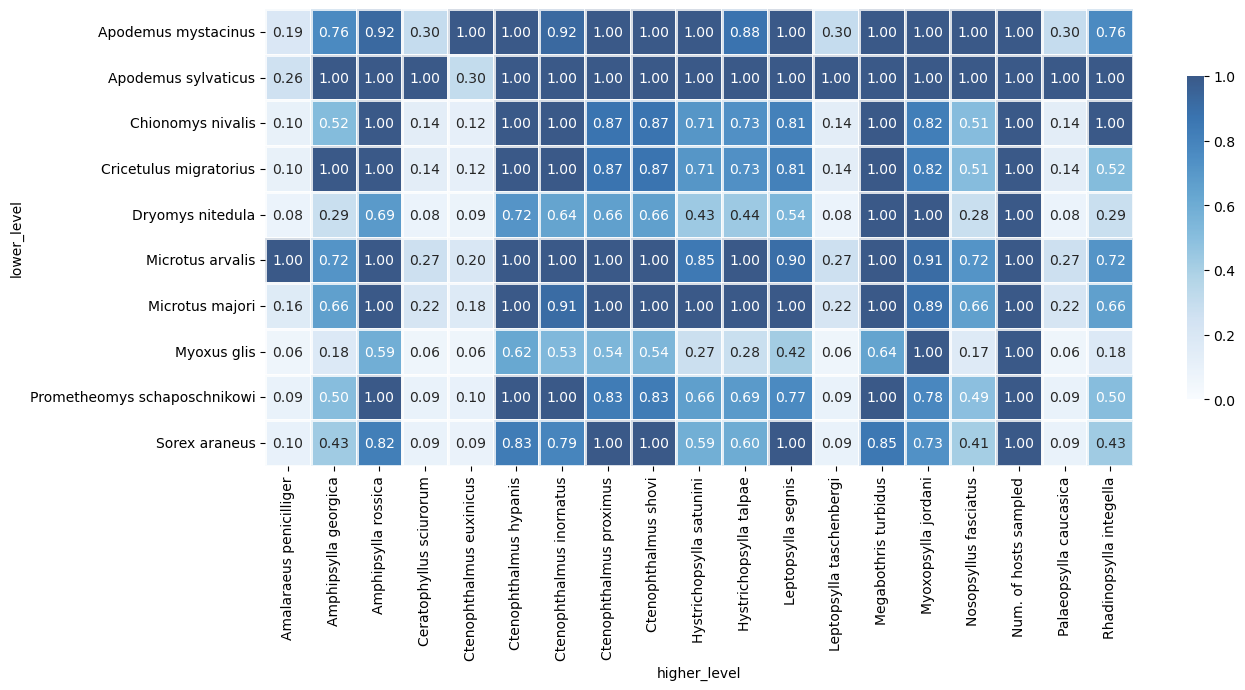

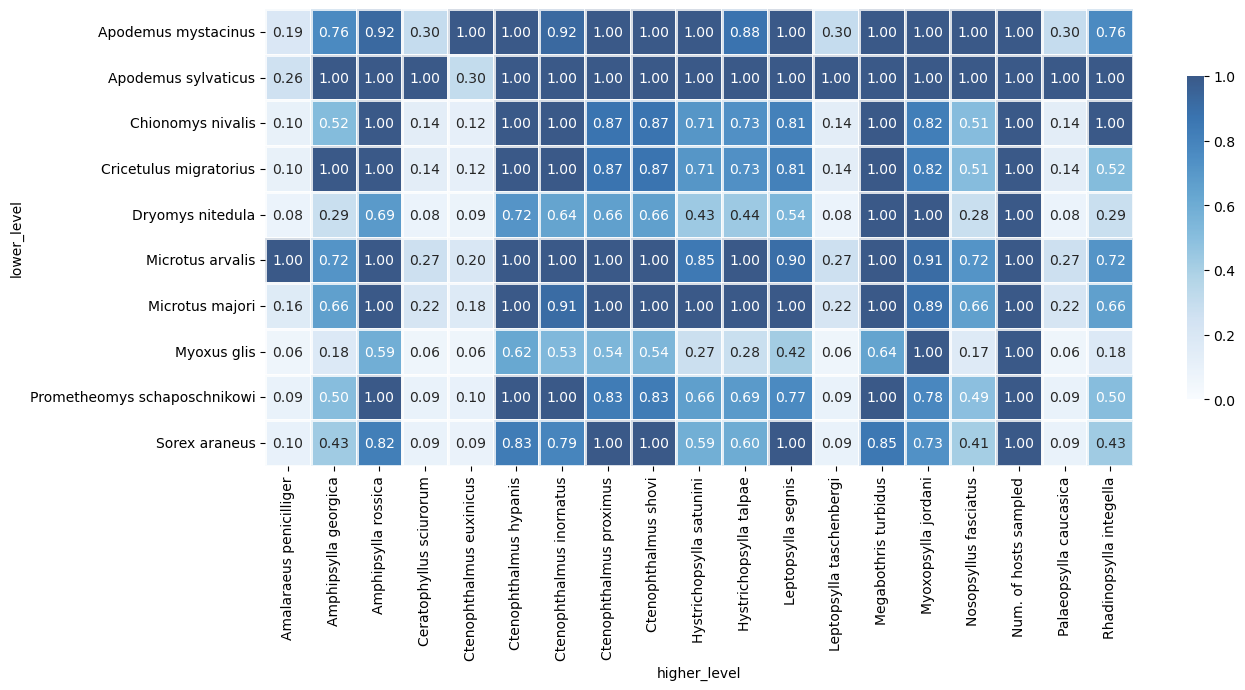

In [13]:
dataframe = handleEdgeList(
    edgeList, 
    linkID_col = 'link_ID', 
    topNodes_col = 'higher_level', 
    bottomNodes_col = 'lower_level', 
    networkID_col = None, 
    groupID_col = None,
    weight_col = 'weight', # currently support only binary weight
    community = 'Host-Parasite', # in case the community is known but not in the groupID_col
    missing_links = None
    )

dataframe_with_features = extractFeatures(dataframe)

probabilities = predictLinks(dataframe_with_features, model, return_pred=False)

plotProbsMatrix(dataframe, probabilities, figsize=(14,14))